### Label propagation

In [1]:
import networkx as nx

def create_toy_network():
    G = nx.Graph()
    edges = [('A','X'), ('A', 'B'),('B','X'), ('X','Y'), ('C','X'), ('C','Y'), ('D','Y')]
    G.add_edges_from(edges)

    G.nodes['A']['label'] = 'RED'
    G.nodes['B']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    G.nodes['D']['label'] = 'RED'
    G.nodes['X']['label'] = None
    G.nodes['Y']['label'] = None
    return G

G = create_toy_network() 
nx.draw(G,labels=G.nodes(), with_labels = True)


In [2]:
def initialize_scores(G, init_value):
    for node_id in G.nodes():
        label = G.nodes[node_id]['label']
    
        if label == 'RED':
          # Labeled nodes: RED
          G.nodes[node_id]['score'] = 1
        elif label == 'BLUE':
          # Labeled nodes: BLUE
          G.nodes[node_id]['score'] = 0
        else:
          # Unlabeled nodes
          G.nodes[node_id]['score'] = init_value
            
initialize_scores(G, 0.5)

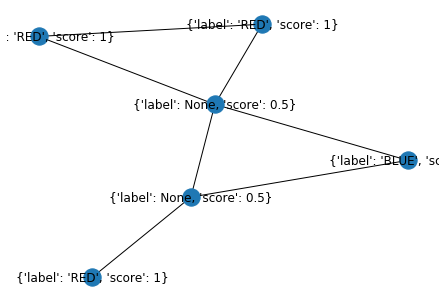

In [3]:
nx.draw(G,labels=G.nodes ,with_labels = True)

In [4]:
def calculate_avg_score(G, node_id):
    score_sum = 0
    n_neighbors = 0
    
    for neighbor_id in G[node_id]:
        score_sum += G.nodes[neighbor_id]['score']
        n_neighbors += 1
        
    return score_sum / n_neighbors

calculate_avg_score(G, 'X') # => 0.625
calculate_avg_score(G, 'Y') # => 0.5

0.5

In [5]:
def propagate(G):
    
    next_scores = {}
    
    for node_id in G.nodes():
        if G.nodes[node_id]['label'] is not None:
          # scores of labeled nodes do not change
            next_scores[node_id] = G.nodes[node_id]['score']
        else:
            next_scores[node_id] = calculate_avg_score(G, node_id)
        
    for node_id in next_scores:
        G.nodes[node_id]['score'] = next_scores[node_id]

propagate(G) # yields the network shown below.

In [6]:
n_steps = 10
for i in range(n_steps):
    propagate(G)
    print("=== After {} steps ===".format(i+1))
    print("X = {}".format(G.nodes['X']['score']))
    print("Y = {}".format(G.nodes['Y']['score']))

=== After 1 steps ===
X = 0.625
Y = 0.5416666666666666
=== After 2 steps ===
X = 0.6354166666666666
Y = 0.5416666666666666
=== After 3 steps ===
X = 0.6354166666666666
Y = 0.5451388888888888
=== After 4 steps ===
X = 0.6362847222222222
Y = 0.5451388888888888
=== After 5 steps ===
X = 0.6362847222222222
Y = 0.5454282407407408
=== After 6 steps ===
X = 0.6363570601851852
Y = 0.5454282407407408
=== After 7 steps ===
X = 0.6363570601851852
Y = 0.5454523533950617
=== After 8 steps ===
X = 0.6363630883487654
Y = 0.5454523533950617
=== After 9 steps ===
X = 0.6363630883487654
Y = 0.5454543627829218
=== After 10 steps ===
X = 0.6363635906957305
Y = 0.5454543627829218


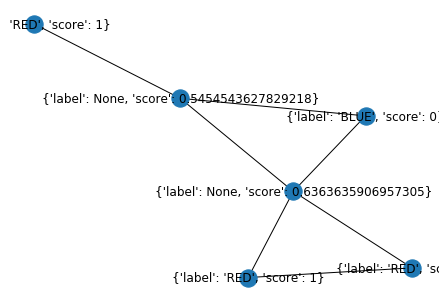

In [7]:
nx.draw(G,labels=G.nodes ,with_labels = True)

## nodel classification

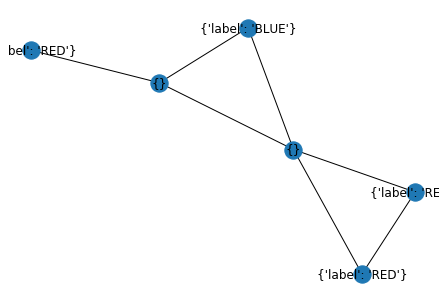

In [8]:
from networkx.algorithms import node_classification

def create_toy_network():
    G = nx.Graph()
    edges = [('A','X'), ('A', 'B'), ('B','X'), ('X','Y'), ('C','X'), ('C','Y'), ('D','Y')]
    G.add_edges_from(edges)

    G.nodes['A']['label'] = 'RED'
    G.nodes['B']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    G.nodes['D']['label'] = 'RED'
    return G

G = create_toy_network() 
nx.draw(G,labels=G.nodes(), with_labels = True)

In [9]:
G.nodes

NodeView(('A', 'X', 'B', 'Y', 'C', 'D'))

### harmonic function

In [10]:
node_classification.harmonic_function(G)

['RED', 'RED', 'RED', 'RED', 'BLUE', 'RED']

### Local and Global Consistency

In [11]:
node_classification.local_and_global_consistency(G)

['RED', 'RED', 'RED', 'RED', 'RED', 'RED']

### Multi graph label propagation
- multi graph로 했을 때 고려 됨
- edge에 weight이 없을 경우 1로 계산, if not weight을 합한 Matrix를 바탕으로 알고리즘이 계산 됨

In [12]:
def create_multi_network():
    
    G = nx.MultiGraph()
    
    edges = [('A','B',{'weight':0.5}),
             ('A','C',{'weight':0.2}),
             ('C','A',{'weight':0.2})]
    
    G.add_edges_from(edges)
    

    G.nodes['B']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    
    return G

In [13]:
multi_G = create_multi_network()

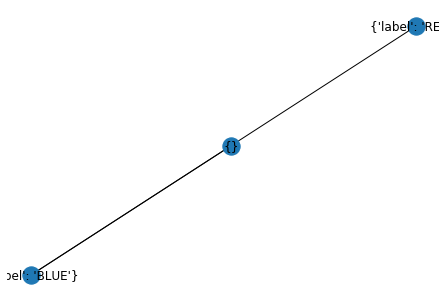

In [14]:
nx.draw(multi_G,labels=multi_G.nodes(), with_labels = True)

In [19]:
multi_G.nodes()

NodeView(('A', 'B', 'C'))

In [20]:
for node_id in multi_G.nodes():
    print(multi_G.nodes()[node_id])

{}
{'label': 'RED'}
{'label': 'BLUE'}


In [21]:
nx.nx_pydot.write_dot(multi_G,'multi_new1.dot')
!neato -T png multi_new1.dot > multi_new1.png

In [22]:
import time 
start = time.time()
node_classification.harmonic_function(multi_G,max_iter=50000)
end = time.time()
print(end-start)

3.5608479976654053


## Evaluation